# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Cancer_Dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
data.drop(["Unnamed: 32", "id"], axis=1, inplace=True)

In [4]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

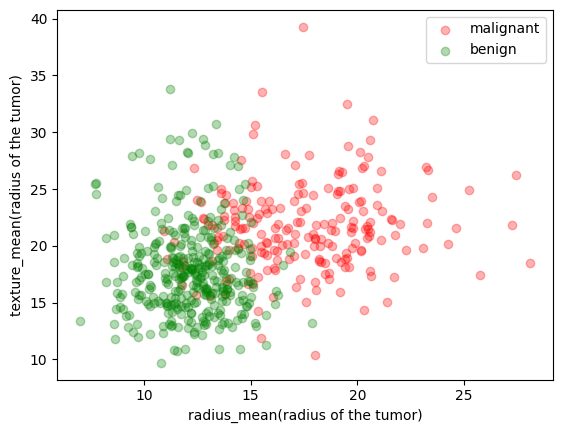

In [5]:
plt.scatter(M.radius_mean, M.texture_mean, color="red", label="malignant",alpha=0.3)
plt.scatter(B.radius_mean, B.texture_mean, color="green", label="benign",alpha=0.3)
plt.xlabel("radius_mean(radius of the tumor)")
plt.ylabel("texture_mean(radius of the tumor)")
plt.legend()

In [6]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.iloc[:,1:3].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=1)

In [8]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()

x_train = st_x.fit_transform(x_train)
x_test  = st_x.transform(x_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree_classification = DecisionTreeClassifier(random_state=1, criterion='entropy')

tree_classification.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [10]:
y_head = tree_classification.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_head)
accuracy

0.8333333333333334

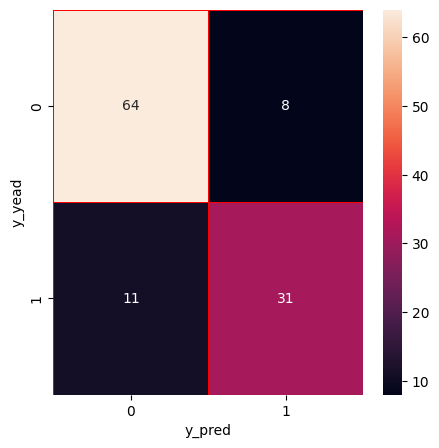

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_head)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='.0f', linewidths=0.5, linecolor="red", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_yead")
plt.show()